<a href="https://colab.research.google.com/github/anandkumarprajapati/EDA-Hotel-Booking-Analysis-/blob/main/EDA_for_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
null_values= df.isnull().sum().sort_values(ascending=False)
null_values[null_values>0]

company     112593
agent        16340
country        488
children         4
dtype: int64

In [ ]:
df2=df.copy() 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df2.drop('company',inplace=True,axis=1)

In [ ]:
# filling children and agents columns with median values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(df2[['children','agent']])
df2[['children','agent']]=imputer.transform(df2[['children','agent']])

In [ ]:
null_values= df2.isnull().sum().sort_values(ascending=False)
null_values[null_values>0]

country    488
dtype: int64

In [ ]:
df2['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BFA        1
DJI        1
ASM        1
BDI        1
MDG        1
Name: country, Length: 177, dtype: int64

In [ ]:
df2['country'].mode().values[0]

'PRT'

In [ ]:
df2['country'].fillna(str(df2['country'].mode().values[0]),inplace=True)

In [ ]:
null_values= df2.isnull().sum().sort_values(ascending=False)
null_values[null_values>0]

Series([], dtype: int64)

In [ ]:
def get_percentage(Column,limit=None):

    Column = Column.value_counts()[:limit]
    
    x = Column.index
    y = Column/Column.sum()*100
    
    return x.values,y.values

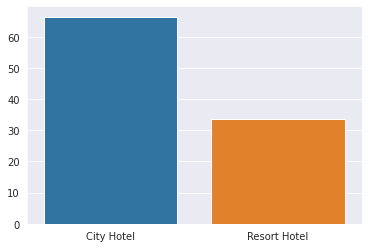

In [ ]:
# distribution percentage of hotel
values,percentage = get_percentage(df2['hotel'])
values,percentage
sns.barplot(x=values,y=percentage)

In [ ]:
# distribution percentage of cancellation 

values,percentage = get_percentage(df2['is_canceled'])
values,percentage

#is_canceled have two unique values: 1 if booking got canceled, else 0

(array([0, 1]), array([62.95837172, 37.04162828]))

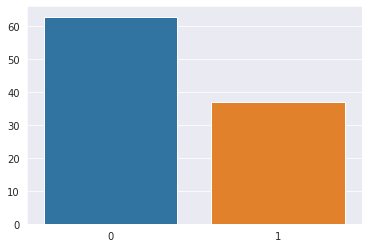

In [ ]:
sns.barplot(x=values,y=percentage)

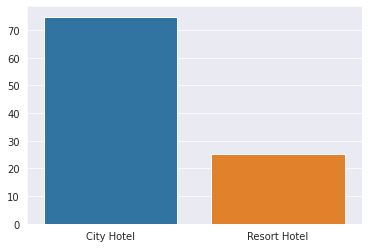

In [ ]:
# distribution percentage of hotel which saw cancellations 

df_is_canceled = df2[df2['is_canceled'] == 1]
series= df_is_canceled['hotel'].value_counts()

hotel_type = series.index
count_percent_cancellation = series.values/series.values.sum()*100

sns.barplot(x=hotel_type,y=count_percent_cancellation)

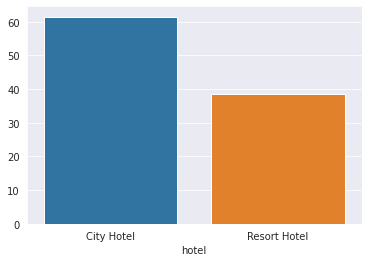

In [ ]:
#distribution of repeated guest hotel wise

series=df_not_canceled.groupby('hotel')["is_repeated_guest"].count()
hotel_type=series.index
count_percent_repeated_guest=series.values/series.values.sum()*100

sns.barplot(x=hotel_type,y=count_percent_repeated_guest)

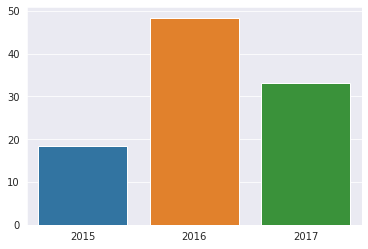

In [ ]:
#bookings that didnt get cancelled dataframe and how many bookings each year
df_not_canceled = df2[df2['is_canceled'] == 0]
values,percentage = get_percentage (df_not_canceled['arrival_date_year'])
sns.barplot(x=values,y=percentage)

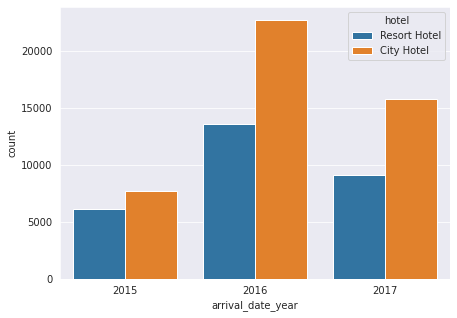

In [ ]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

In [ ]:
df_not_canceled['arrival_date_month'].value_counts()

August       8638
July         7919
May          7114
October      6914
March        6645
April        6565
June         6404
September    6392
February     5372
November     4672
December     4409
January      4122
Name: arrival_date_month, dtype: int64

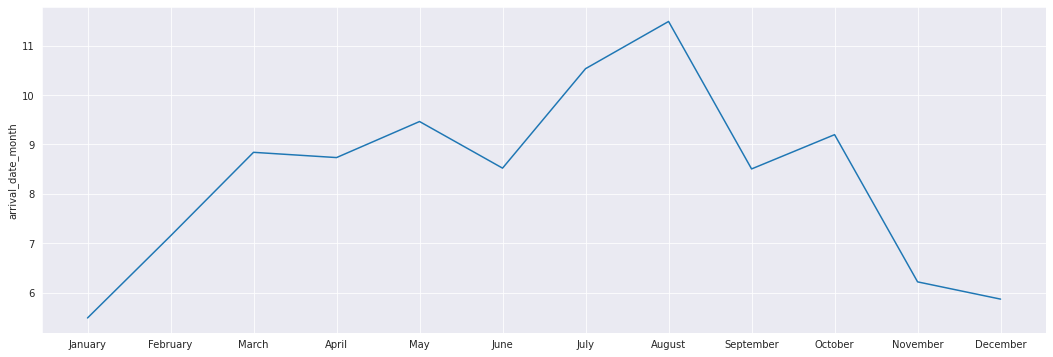

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

different_months = sorted_months.index
montly_bookings_percentage = sorted_months/sorted_months.sum()*100


plt.subplots(figsize=(18,6))
sns.lineplot(x=different_months,y=montly_bookings_percentage)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


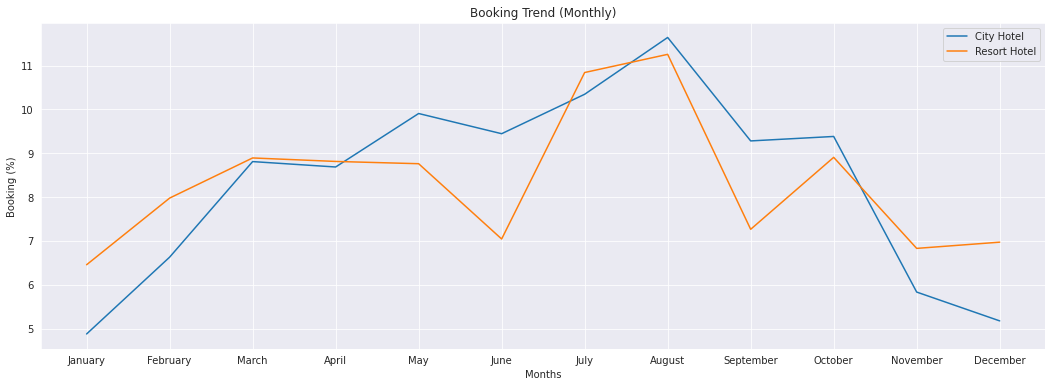

In [ ]:
## Select only City Hotel
sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

## Select only Resort Hotel
sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)

plt.show()

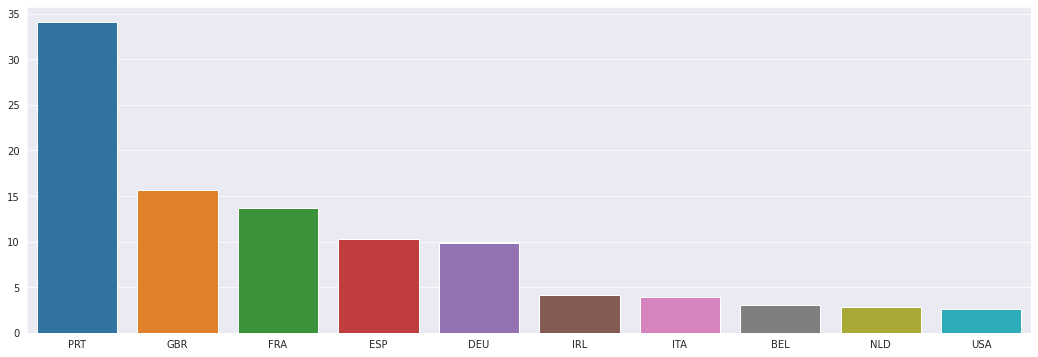

In [ ]:
Countries,percetage_bookings=get_percentage(df_not_canceled['country'], limit=10)
plt.subplots(figsize=(18,6))
sns.barplot(x=Countries,y=percetage_bookings)

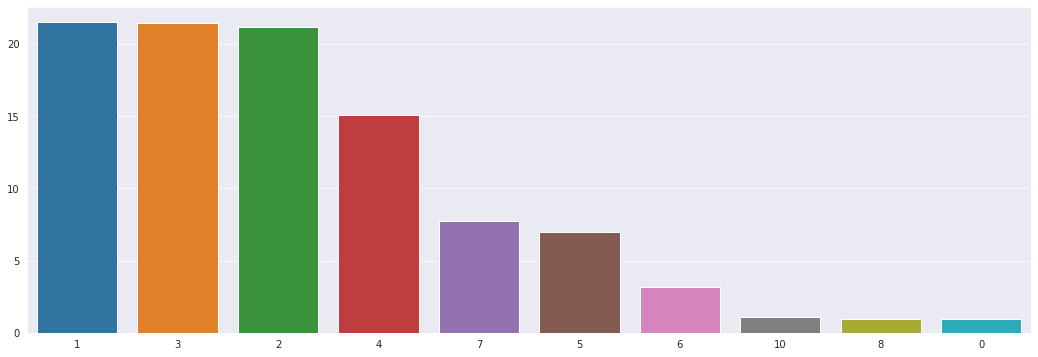

In [ ]:
total_nights= df_not_canceled['stays_in_weekend_nights'] +  df_not_canceled['stays_in_week_nights']

#print(total_nights.value_counts(sort=True))
days_in_hotel ,percent_people = get_percentage(total_nights, limit=10)

plt.subplots(figsize=(18,6))
sns.barplot(x=days_in_hotel,y=percent_people, order=days_in_hotel)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


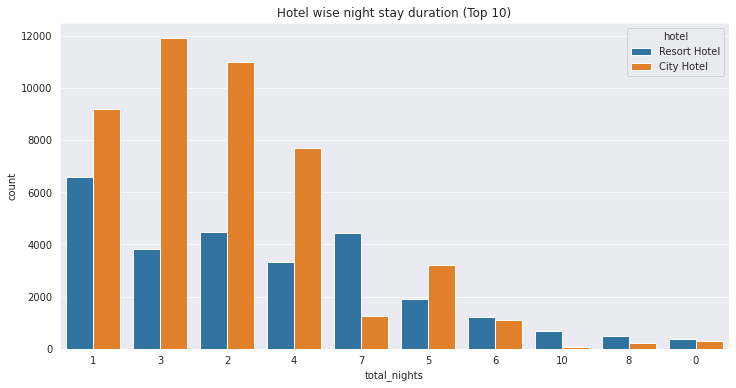

In [ ]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts(sort=True).iloc[:10].index, ax=ax);

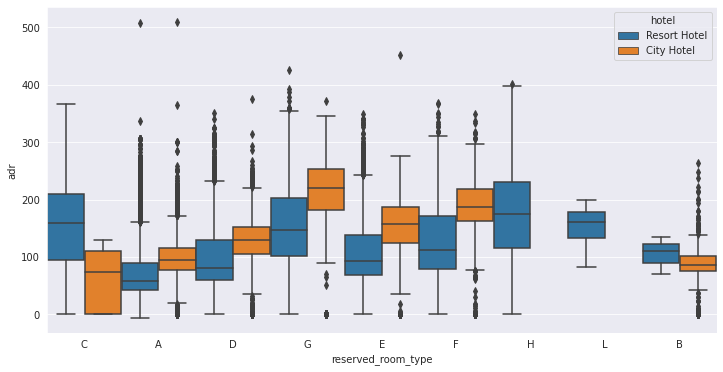

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'reserved_room_type', y = 'adr',data=df_not_canceled,hue='hotel',width =1)

(array([1.9746e+04, 7.0260e+03, 6.4620e+03, 4.8130e+03, 4.8230e+03,
        4.8260e+03, 3.4780e+03, 3.5460e+03, 3.6180e+03, 3.3010e+03,
        3.1930e+03, 2.8190e+03, 2.4580e+03, 3.1060e+03, 2.2060e+03,
        2.4860e+03, 2.1690e+03, 1.9380e+03, 2.2730e+03, 1.7550e+03,
        1.8930e+03, 2.1660e+03, 1.9640e+03, 1.5540e+03, 2.0240e+03,
        1.3920e+03, 1.3530e+03, 1.2640e+03, 1.4530e+03, 1.2820e+03,
        9.2000e+02, 6.7400e+02, 9.6100e+02, 8.6700e+02, 7.5100e+02,
        1.0420e+03, 7.1000e+02, 1.2980e+03, 7.4900e+02, 6.8600e+02,
        7.9500e+02, 6.7100e+02, 7.1300e+02, 6.3900e+02, 4.1100e+02,
        6.5300e+02, 4.3000e+02, 3.7500e+02, 2.5200e+02, 3.2600e+02,
        9.8000e+01, 2.5900e+02, 2.6200e+02, 3.1100e+02, 1.6700e+02,
        1.3700e+02, 2.5400e+02, 1.7000e+02, 9.4000e+01, 7.3000e+01,
        1.3800e+02, 1.1000e+02, 2.0000e+02, 1.5200e+02, 1.0400e+02,
        1.7000e+01, 3.6000e+01, 1.7000e+01, 5.3000e+01, 1.7000e+01,
        5.3000e+01, 1.7000e+01, 3.5000e+01, 4.00

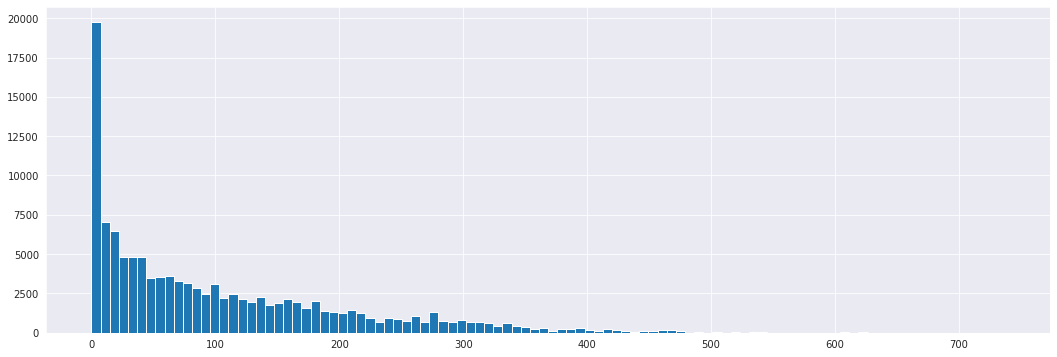

In [ ]:

plt.subplots(figsize=(18,6))

plt.hist(df2['lead_time'],bins=100)

(array([6345., 3460., 2069., 1816., 1715., 1565., 1445., 1331., 1138.,
        1968.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

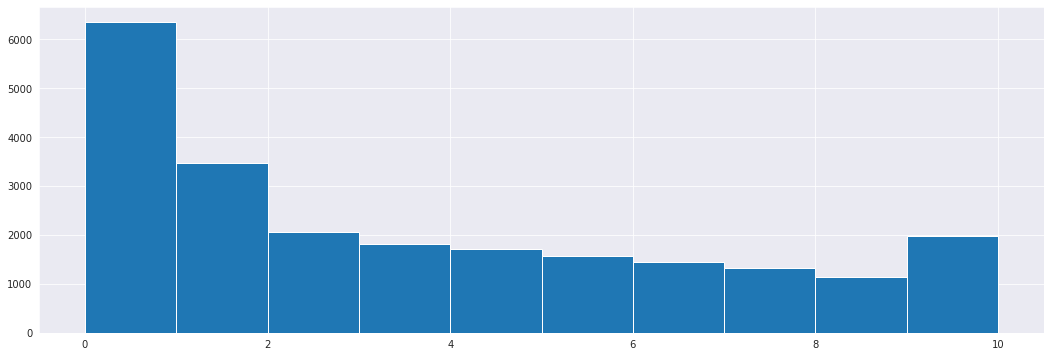

In [ ]:
plt.subplots(figsize=(18,6))

plt.hist(df2['lead_time'],bins=[0,1,2,3,4,5,6,7,8,9,10])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd428cdff90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd427cd2d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4297421d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd428da9490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd427dd29d0>,
  <matplotlib.lines.Line2D at 0x7fd427cd20d0>]}

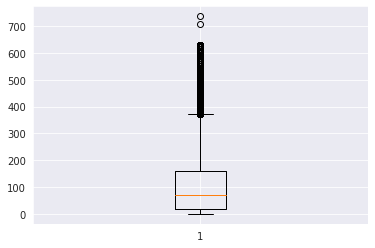

In [ ]:
plt.boxplot(df2.lead_time,)

(array([ 694.,  823.,    0.,  984.,    0.,  981.,    0.,  962.,    0.,
        1123.,    0., 1425.,    0., 1423.,    0., 1393.,    0., 1412.,
           0., 1452.,    0., 1453.,    0., 1534.,    0., 1432., 1642.,
           0., 1429.,    0., 1621.,    0., 1612.,    0., 1539.,    0.,
        1567.,    0., 1794.,    0., 1530.,    0., 1551.,    0., 1475.,
           0., 1422.,    0., 1530.,    0., 1679., 1804.,    0., 1747.,
           0., 1844.,    0., 1746.,    0., 1879.,    0., 2075.,    0.,
        1996.,    0., 1670.,    0., 1354.,    0., 1353.,    0., 1622.,
           0., 1594.,    0., 1398., 1613.,    0., 1681.,    0., 1453.,
           0., 1527.,    0., 1180.,    0.,  985.,    0., 1309.,    0.,
        1129.,    0., 1117.,    0.,  908.,    0.,  687.,    0.,  841.,
        1172.]),
 array([ 1.  ,  1.52,  2.04,  2.56,  3.08,  3.6 ,  4.12,  4.64,  5.16,
         5.68,  6.2 ,  6.72,  7.24,  7.76,  8.28,  8.8 ,  9.32,  9.84,
        10.36, 10.88, 11.4 , 11.92, 12.44, 12.96, 13.48, 14.

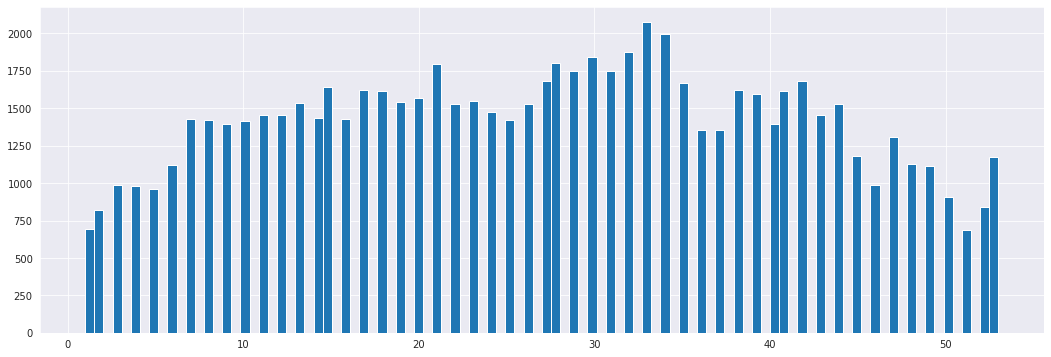

In [ ]:
plt.subplots(figsize=(18,6))

plt.hist(df_not_canceled['arrival_date_week_number'],bins=100)